### **Machine Learning Mid Exam**
###**Random Forest**

Nama : Ardhien Fadhillah Suhartono

NIM  : 1103204137

Dataset : [Movie Industry](https://www.kaggle.com/datasets/danielgrijalvas/movies)

ChatGPT : [ChatGPT](https://chat.openai.com/share/b5180bf5-89c5-4c53-b743-c1336293ea70)

### **RANDOM FOREST**

Klasifikasi menggunakan random forest adalah salah satu metode klasifikasi data yang menggunakan ensemble learning. Ensemble learning adalah metode pembelajaran mesin yang menggabungkan hasil dari beberapa model untuk mendapatkan hasil yang lebih baik daripada model tunggal.

Dalam klasifikasi menggunakan random forest, ensemble learning dilakukan dengan membangun kumpulan pohon keputusan (decision tree) yang saling independen. Setiap pohon keputusan dibangun menggunakan sampel data yang berbeda dan atribut yang dipilih secara acak.

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




1.   Baris "from google.colab import drive" berfungsi sebagai mengimpor pustaka yang diperlukan (drive) dari Google Colab untuk memungkinkan interaksi dengan Google Drive.
2.   Baris "drive.mount('/content/drive')" berguna untuk memulai proses me-mount Google Drive ke lingkungan Colab. Saat Anda menjalankan sel ini, sebuah tautan akan dihasilkan. Klik tautan tersebut, pilih akun Google Anda, dan berikan izin untuk mengakses Google Drive.



### **Exploratory Data Analysis**

Exploratory data analysis (EDA) adalah langkah penting dalam proses analisis data. Ini melibatkan pemeriksaan dan ringkasan kumpulan data untuk memahami karakteristik utamanya, mengidentifikasi pola, dan mendeteksi anomali. EDA membantu ilmuwan dan analis data mendapatkan pemahaman yang lebih mendalam tentang data sebelum mendalami pemodelan atau pengujian hipotesis yang lebih kompleks.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Kode tersebut mengimpor pustaka pandas untuk analisis data, matplotlib.pyplot untuk visualisasi, dan seaborn untuk meningkatkan estetika plot. Alias seperti pd, plt, dan sns digunakan untuk memanggil fungsi secara lebih ringkas.

In [43]:
data='/content/drive/MyDrive/Dataset/movies.csv'
df = pd.read_csv(data)

Kode tersebut membaca file CSV dengan path '/content/drive/MyDrive/Dataset/movies.csv' dan menyimpannya dalam dataframe `df` menggunakan pustaka pandas.

In [44]:
print(df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

Kode tersebut digunakan untuk mencetak lima baris pertama dari DataFrame `df`.

In [45]:
print(df.describe())

              year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000  


Fungsi ini digunakan untuk menampilkan ringkasan statistik deskriptif dari DataFrame, termasuk rata-rata, simpangan baku, nilai minimum, kuartil, dan nilai maksimum.



1. Count: Jumlah entri yang tidak hilang untuk setiap kolom.
2. Mean: Rata-rata atau nilai tengah dari data.
3. Std (Standard Deviation): Deviasi standar, mengukur sejauh mana nilai-nilai tersebar dari rata-rata.
4. Min (Minimum): Nilai terkecil dalam kolom.
5. 25% (Percentile 25th): Nilai yang membagi 25% data terendah.
6. 50% (Percentile 50th): Median atau nilai tengah, membagi data menjadi dua bagian yang sama.
7. 75% (Percentile 75th): Nilai yang membagi 75% data terendah.
8. Max (Maximum): Nilai terbesar dalam kolom.



In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None


Kode tersebut mencetak informasi struktur data frame (DataFrame) seperti tipe data dan jumlah nilai non-null pada setiap kolom.

### **Data Visualization**

adalah representasi grafis dari data dan informasi. Ini melibatkan perancangan dan pembuatan elemen visual, seperti bagan, grafik, dan peta, untuk mengkomunikasikan data secara efektif. Visualisasi data membantu orang memahami tren, pola, dan hubungan dalam data dengan lebih mudah daripada sekadar membaca teks atau angka.

Kode tersebut menggunakan pustaka seaborn dan matplotlib untuk membuat subplot yang menampilkan visualisasi distribusi beberapa fitur dalam dataset film, seperti distribusi rating, genre, tahun rilis, skor, jumlah suara (votes), dan durasi (runtime). Setiap subplot disusun dalam tata letak 3x2 untuk memberikan gambaran yang lebih komprehensif tentang karakteristik dataset film.

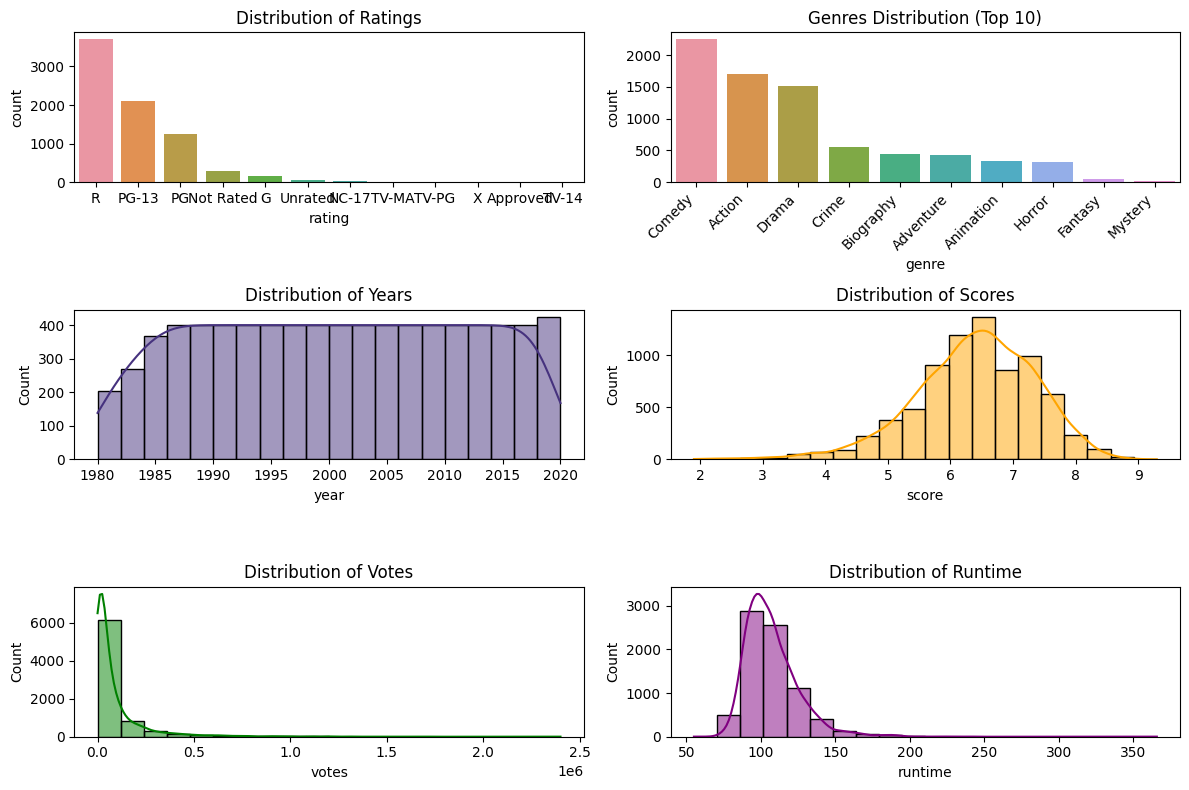

In [47]:
# Set warna dasar Seaborn
sns.set_palette("viridis")

# Visualisasi distribusi rating
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')

# Visualisasi distribusi genre (hanya menampilkan 10 genre teratas)
plt.subplot(3, 2, 2)
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().head(10).index)
plt.title('Genres Distribution (Top 10)')
plt.xticks(rotation=45, ha='right')

# Visualisasi distribusi year
plt.subplot(3, 2, 3)
sns.histplot(df['year'], bins=20, kde=True)
plt.title('Distribution of Years')

# Visualisasi distribusi score
plt.subplot(3, 2, 4)
sns.histplot(df['score'], bins=20, kde=True, color='orange')
plt.title('Distribution of Scores')

# Visualisasi distribusi votes
plt.subplot(3, 2, 5)
sns.histplot(df['votes'], bins=20, kde=True, color='green')
plt.title('Distribution of Votes')

# Visualisasi distribusi runtime
plt.subplot(3, 2, 6)
sns.histplot(df['runtime'], bins=20, kde=True, color='purple')
plt.title('Distribution of Runtime')

# Menyusun tata letak dan menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-48-8da845d37199>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


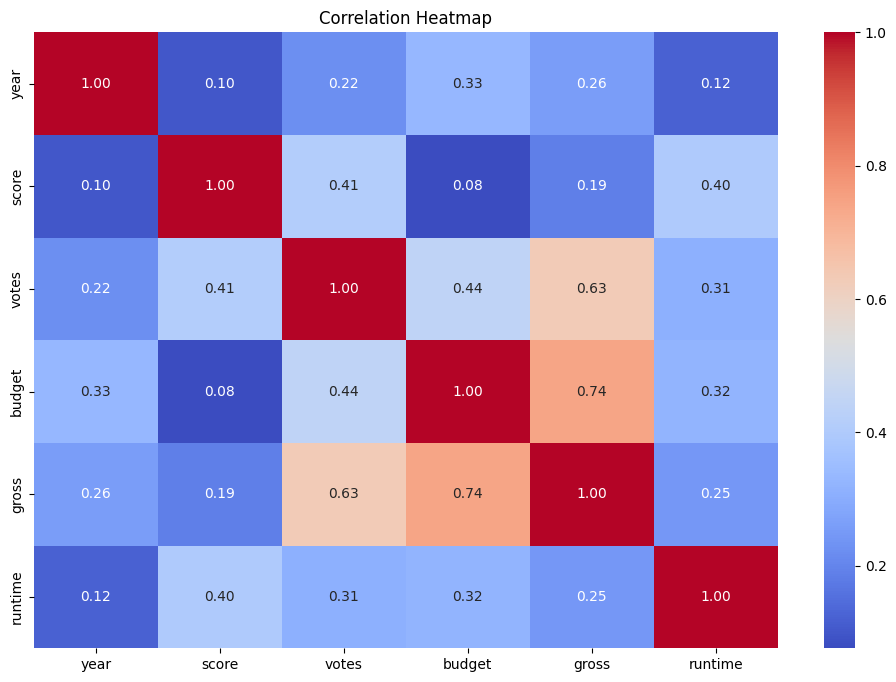

In [48]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Kode tersebut membuat dan menampilkan peta panas korelasi (heatmap) dari data frame `df` menggunakan pustaka `seaborn`. Peta panas ini memberikan visualisasi warna yang mencerminkan tingkat korelasi antara pasangan variabel dalam dataframe. Parameter seperti `annot=True` menambahkan nilai korelasi di setiap sel, `cmap='coolwarm'` mengatur skema warna, dan `fmt=".2f"` mengatur format angka desimal.

### **Training Data**

Dalam konteks machine learning dan data mining, data pelatihan mengacu pada contoh berlabel yang digunakan untuk melatih model pembelajaran mesin. Data ini penting untuk mengajarkan model cara mengidentifikasi pola dan membuat prediksi. Kualitas dan kuantitas data pelatihan berdampak signifikan terhadap performa model yang dihasilkan.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Kode tersebut memiliki beberapa tujuan:
1. Mengimpor pustaka `pandas` dengan alias `pd` untuk analisis data.
2. Mengimpor fungsi `train_test_split` dari pustaka `sklearn.model_selection` untuk membagi dataset menjadi data latih dan data uji.
3. Mengimpor kelas `RandomForestClassifier` dari pustaka `sklearn.ensemble` untuk membuat model klasifikasi menggunakan algoritma Random Forest.
4. Mengimpor fungsi `LabelEncoder` dari pustaka `sklearn.preprocessing` untuk mengubah label kategori menjadi bilangan bulat.
5. Mengimpor fungsi `accuracy_score`, `classification_report`, dan `confusion_matrix` dari pustaka `sklearn.metrics` untuk melakukan evaluasi performa model klasifikasi.

In [50]:
# Membaca dataset film
df = pd.read_csv('/content/drive/MyDrive/Dataset/movies.csv')

# Menentukan target column dan features
target_column = 'rating'
features = ['year', 'score', 'votes', 'budget', 'gross', 'runtime']

# Mengambil hanya kolom yang diinginkan
df_filtered = df[features + [target_column]]
print(df_filtered)

      year  score      votes      budget        gross  runtime rating
0     1980    8.4   927000.0  19000000.0   46998772.0    146.0      R
1     1980    5.8    65000.0   4500000.0   58853106.0    104.0      R
2     1980    8.7  1200000.0  18000000.0  538375067.0    124.0     PG
3     1980    7.7   221000.0   3500000.0   83453539.0     88.0     PG
4     1980    7.3   108000.0   6000000.0   39846344.0     98.0      R
...    ...    ...        ...         ...          ...      ...    ...
7663  2020    3.1       18.0      7000.0          NaN     90.0    NaN
7664  2020    4.7       36.0         NaN          NaN     90.0    NaN
7665  2020    5.7       29.0     58750.0          NaN      NaN    NaN
7666  2020    NaN        NaN     15000.0          NaN    120.0    NaN
7667  2020    5.7        7.0         NaN          NaN    102.0    NaN

[7668 rows x 7 columns]


Kode tersebut membaca dataset film dari file CSV yang terletak di Google Drive, kemudian menentukan kolom target ('rating') dan fitur-fitur ('year', 'score', 'votes', 'budget', 'gross', 'runtime'). Selanjutnya, hanya kolom-kolom yang ditentukan tersebut yang diambil dari dataset, dan hasilnya dicetak.

In [51]:
df.dropna(inplace=True)

Fungsi `df.dropna(inplace=True)` menghapus baris yang mengandung nilai null (NaN) dari DataFrame `df`, dan parameter `inplace=True` menyebabkan perubahan tersebut dilakukan pada DataFrame asli tanpa perlu menghasilkan DataFrame baru.

In [52]:
le = LabelEncoder()
df['encoded_rating'] = le.fit_transform(df['rating'])
df['score'].fillna(df['score'].mean(), inplace=True)

Kode tersebut memiliki dua bagian:

1. **Label Encoding (LabelEncoder):** Menggunakan LabelEncoder dari scikit-learn untuk mengonversi nilai pada kolom 'rating' ke dalam bentuk bilangan bulat. Ini berguna saat kita bekerja dengan algoritma pembelajaran mesin yang memerlukan input berupa bilangan bulat, seperti model klasifikasi.

2. **Pengisian Nilai Kosong (fillna):** Menggantikan nilai yang hilang (NaN) pada kolom 'score' dengan nilai rata-rata dari kolom tersebut. Langkah ini membantu mengatasi masalah nilai yang hilang pada dataset, sehingga data menjadi lebih lengkap dan dapat digunakan untuk analisis lebih lanjut atau pelatihan model.

In [65]:
features = ['year', 'score', 'votes']
X = df[features]
y = df['rating']

Kode tersebut berfungsi untuk memilih subset dari DataFrame `df` yang terdiri dari kolom-kolom 'year', 'released', 'score', dan 'votes' sebagai fitur (X) dan kolom 'rating' sebagai target (y). Ini adalah langkah awal dalam mempersiapkan data untuk analisis atau pemodelan, di mana Anda memilih variabel yang dianggap relevan untuk digunakan dalam analisis atau untuk melatih model prediktif.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fungsi `train_test_split` digunakan untuk membagi dataset menjadi dua bagian, yakni data latih (training set) dan data uji (test set), dengan proporsi tertentu. Dalam contoh di atas, `X` dan `y` adalah fitur dan target dari dataset, `test_size=0.2` menunjukkan bahwa 20% dari data akan digunakan sebagai test set, dan `random_state=42` digunakan untuk menghasilkan pembagian yang sama jika fungsi ini dijalankan lebih dari satu kali. Variabel `X_train`, `X_test`, `y_train`, dan `y_test` akan berisi data latih dan uji untuk fitur dan target masing-masing.

In [67]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Kode tersebut digunakan untuk membuat dan melatih model klasifikasi menggunakan algoritma Random Forest. `RandomForestClassifier` adalah model yang termasuk dalam kategori ensemble learning, di mana model ini membangun beberapa pohon keputusan secara simultan dan menggabungkan hasil prediksi dari masing-masing pohon untuk menghasilkan prediksi akhir. `fit` digunakan untuk melatih model dengan data pelatihan (`X_train` dan `y_train`), sehingga model dapat belajar pola dalam data dan dapat digunakan untuk membuat prediksi pada data yang belum pernah dilihat sebelumnya. Parameter `random_state` digunakan untuk memastikan reproduktibilitas, sehingga hasil yang dihasilkan dapat direplikasi dengan mempertahankan keadaan awal yang sama.

In [68]:
y_pred = model.predict(X_test)

`y_pred = model.predict(X_test)` digunakan untuk membuat prediksi (labels) pada data uji (`X_test`) menggunakan model yang telah dilatih (`model`). Hasil prediksi ini disimpan dalam variabel `y_pred`. Dengan kata lain, kita menggunakan model yang telah dibuat untuk memprediksi output yang seharusnya dari data uji yang diberikan.

In [69]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fungsi-fungsi tersebut digunakan untuk mengukur dan mengevaluasi performa model klasifikasi:

1. `accuracy_score(y_test, y_pred)`: Mengukur akurasi model dengan membandingkan nilai prediksi (`y_pred`) dengan nilai sebenarnya (`y_test`). Akurasi merupakan rasio prediksi yang benar terhadap total jumlah data.

2. `confusion_matrix(y_test, y_pred)`: Membuat matriks kebingungan (confusion matrix) yang menunjukkan jumlah data yang diklasifikasikan dengan benar dan salah berdasarkan empat kategori: true positive (TP), true negative (TN), false positive (FP), dan false negative (FN).

3. `classification_report(y_test, y_pred)`: Menyediakan ringkasan statistik yang melibatkan precision, recall, dan f1-score untuk setiap kelas. Precision mengukur ketepatan klasifikasi positif, recall mengukur sejauh mana model dapat mengenali semua instance positif, dan f1-score adalah rata-rata harmonik dari precision dan recall.

In [70]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.45069124423963136
Confusion Matrix:
 [[  0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   7   9   0]
 [  0   0   0   0   0   1   2   0]
 [  0   0   0   0   0   0   8   0]
 [  0   0   0   0  28  56 106   0]
 [  0   0   0   0  30 140 177   0]
 [  0   1   0   2  54 137 321   3]
 [  0   0   0   0   0   0   2   0]]
Classification Report:
               precision    recall  f1-score   support

    Approved       0.00      0.00      0.00         1
           G       0.00      0.00      0.00        16
       NC-17       0.00      0.00      0.00         3
   Not Rated       0.00      0.00      0.00         8
          PG       0.25      0.15      0.18       190
       PG-13       0.41      0.40      0.41       347
           R       0.51      0.62      0.56       518
     Unrated       0.00      0.00      0.00         2

    accuracy                           0.45      1085
   macro avg       0.15      0.15      0.14      1085
weighted avg       0.42      0.45      0.43      1

Kode ini digunakan untuk mencetak informasi evaluasi model klasifikasi.
- `accuracy` adalah akurasi dari model, yaitu sejauh mana model dapat memprediksi dengan benar.
- `conf_matrix` adalah matriks konfusi, yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
- `classification_rep` adalah laporan klasifikasi yang memberikan ringkasan berbagai metrik evaluasi seperti presisi, recall, dan f1-score untuk setiap kelas.

### **Evaluating Data**

adalah proses menilai kualitas, kelengkapan, dan keakuratan data sebelum digunakan untuk analisis atau pengambilan keputusan. Ini merupakan langkah penting dalam setiap proyek berbasis data, karena membantu memastikan bahwa data dapat diandalkan dan dipercaya.

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Fungsi-fungsi tersebut digunakan untuk melakukan pemisahan dataset menjadi data latih dan data uji menggunakan `train_test_split`, melatih model regresi acak hutan menggunakan `RandomForestRegressor`, dan mengukur kinerja model dengan menggunakan metrik mean squared error (`mean_squared_error`).

In [57]:
df_cleaned = df.dropna()

Fungsi dari perintah `df_cleaned = df.dropna()` adalah menghapus semua baris yang memiliki nilai null (NaN) dari DataFrame `df` dan menyimpan hasilnya ke dalam DataFrame baru yang disebut `df_cleaned`.

In [78]:
features = ['year', 'votes']
target = 'score'

Fungsi dari potongan kode tersebut adalah memilih fitur-fitur tertentu ('year', 'released', 'score', dan 'votes') sebagai variabel independen (X) dan menetapkan variabel dependen (y) sebagai 'rating'. Ini adalah langkah awal dalam persiapan data untuk analisis atau pemodelan yang melibatkan variabel tersebut.

In [79]:
X = df_cleaned[features]
y = df_cleaned[target]

Dua baris kode tersebut berfungsi untuk memilih subset dari DataFrame `df_cleaned` yang hanya mengandung kolom-kolom yang terdapat dalam list `features` dan menetapkannya ke variabel `X`. Selanjutnya, variabel `y` diisi dengan data dari kolom target yang diberikan oleh variabel `target`. Ini adalah langkah awal untuk memisahkan fitur (features) yang akan digunakan dalam pembuatan model dari label atau target yang akan diprediksi.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fungsi `train_test_split` digunakan untuk membagi dataset menjadi dua subset, yaitu data pelatihan (train) dan data pengujian (test). Variabel `X_train` dan `X_test` akan berisi fitur-fitur dari kedua subset tersebut, sedangkan `y_train` dan `y_test` akan berisi label atau target yang sesuai dengan masing-masing subset. Pembagian dilakukan dengan proporsi tertentu, dalam kasus ini, 80% data digunakan untuk pelatihan (`X_train` dan `y_train`), dan 20% data digunakan untuk pengujian (`X_test` dan `y_test`). Parameter `random_state` digunakan untuk memastikan hasil pembagian yang sama jika fungsi ini dijalankan kembali.

In [81]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Kode ini membuat dan melatih model regresi menggunakan algoritma RandomForestRegressor dari scikit-learn. Model ini digunakan untuk memprediksi nilai variabel target (y) berdasarkan fitur-fitur (X) yang diberikan. Dalam konteks ini, X_train adalah himpunan fitur dari data latih, dan y_train adalah variabel target dari data latih. Model ini dibuat dengan pengaturan acak yang telah ditentukan (random_state=42) untuk memastikan reproduktibilitas. Setelah dilatih, model ini dapat digunakan untuk membuat prediksi berdasarkan data uji atau data baru.

In [82]:
y_pred = rf_model.predict(X_test)

Fungsi `y_pred = rf_model.predict(X_test)` digunakan untuk melakukan prediksi label target (`y`) pada data uji (`X_test`) menggunakan model Random Forest (`rf_model`). Hasil prediksi tersebut disimpan dalam variabel `y_pred` untuk kemudian dapat dibandingkan dengan label sebenarnya pada data uji guna mengevaluasi performa model.

In [85]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.8461494343803955


Kode tersebut menghitung Mean Squared Error (MSE), sebuah metrik evaluasi untuk mengevaluasi sejauh mana model regresi numerik cocok dengan data yang diuji. MSE mengukur rata-rata kuadrat perbedaan antara nilai sebenarnya (y_test) dan nilai yang diprediksi oleh model (y_pred). Semakin rendah MSE, semakin baik model dalam memprediksi data yang diuji.

Mean Squared Error (MSE):

Definisi: MSE adalah rata-rata dari kuadrat selisih antara nilai sebenarnya (y) dan nilai yang diprediksi (ŷ).
Formula: MSE = (1/n) Σ(y - ŷ)², di mana n adalah jumlah sampel.
Interpretasi: Semakin rendah nilai MSE, semakin baik modelnya. MSE memberikan gambaran tentang seberapa dekat prediksi model dengan nilai sebenarnya. Namun, MSE cenderung memberikan bobot lebih pada kesalahan yang besar karena selisihnya dikuadrat.